In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3 as sq
import csv

In [10]:
con=sq.connect("sales.db")
cur=con.cursor()

In [11]:
#create table
query="""create table if not exists sales(
         sid INTEGER PRIMARY KEY,
        year INTEGER NOT NULL,
        totalsales REAL NOT NULL
        )"""

In [12]:
cur.execute(query)

In [13]:
# Insert sample records into the Sales table
sales_data = [
    (101, 2021, 30000.0),
    (102, 2021, 10000.0),
    (103, 2021, 10000.0),
    (104, 2022, 11000.0),
    (105, 2023, 88000.0),
]

In [14]:
cur.executemany('INSERT INTO sales (sid, year, totalsales) VALUES (?, ?, ?)', sales_data)


In [15]:
cur.execute('SELECT * FROM Sales')
sales_data = cur.fetchall()

with open('sales.csv', 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    # Write the header
    csv_writer.writerow(['sid', 'year', 'totalsales'])
    # Write the data
    csv_writer.writerows(sales_data)

# Close the connection
con.close()

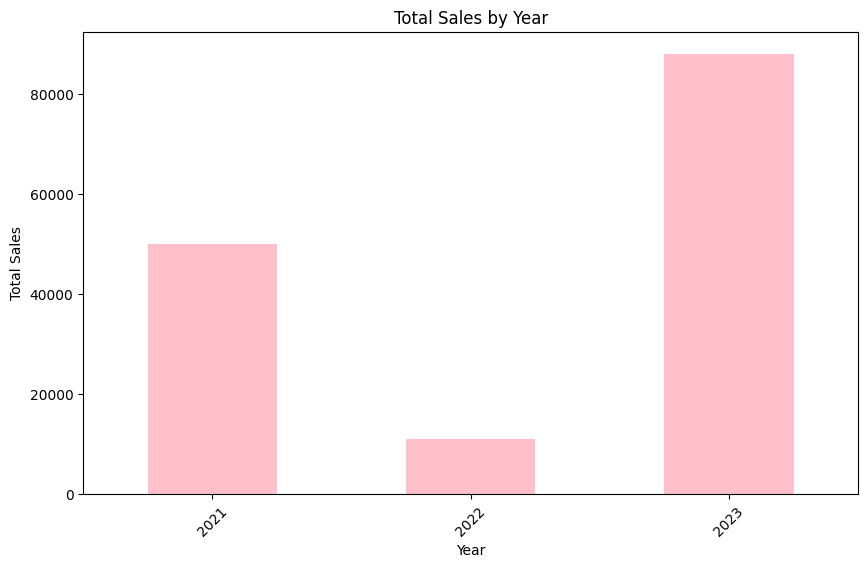

In [16]:
df = pd.read_csv('sales.csv')

yearly_sales = df.groupby('year')['totalsales'].sum()

plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='bar', color='pink')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.xticks(rotation=45)
# Show the plot
plt.show()